<center><img src='https://netacad.centralesupelec.fr/img/cs.jpg' width=200></center>

<h1>
<hr style=" border:none; height:3px;">
<center>Objectif : Prediction du retard des trains un mois à l'avance</center>
<hr style=" border:none; height:3px;">
</h1>


## Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') #, module = "matplotlib\..*")
%matplotlib inline

## Etape 1 : Exploration des données

### 1.1 Exploration basique des données

In [2]:
data_path = "../dataset/regularite-mensuelle-tgv-aqst.csv" 
df_base = pd.read_csv(data_path, sep=",") #, index_col=0)
# df_base.to_csv("regularite-mensuelle-tgv-aqst.csv", index=False)
df_base.head()

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,...,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,...,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,...,26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,...,8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,...,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


In [3]:
df_base.describe()

,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,commentaire_retards_depart,nb_train_retard_arrivee,retard_moyen_arrivee,...,nb_train_retard_sup_15,retard_moyen_trains_retard_sup15,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
count,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,8154.000000,0.0,8154.000000,8154.000000,...,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,169.860314,257.198308,11.349644,NaN,88.434265,11.205745,3.076737,NaN,34.516066,33.950971,...,24.434511,32.193823,11.642016,4.245892,23.266846,21.888418,19.052124,18.995179,6.714513,7.127315
std,87.390774,173.815703,26.544553,NaN,90.384803,12.476780,5.432676,NaN,29.729349,15.702663,...,21.400761,20.195926,11.225104,4.901032,16.805192,15.692521,14.947548,14.256533,8.080759,10.249453
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,...,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,142.000000,0.000000,NaN,22.000000,5.128410,1.140258,NaN,13.000000,24.636941,...,9.000000,12.140350,4.000000,1.000000,11.764706,11.538462,8.695652,9.523810,0.000000,0.000000
50%,164.000000,221.000000,3.000000,NaN,55.000000,9.036447,2.248271,NaN,27.000000,32.441236,...,19.000000,34.932765,9.000000,3.000000,20.967742,20.000000,16.949153,17.165179,5.000000,3.703704
75%,221.000000,333.000000,10.000000,NaN,129.000000,14.219375,3.903651,NaN,47.000000,41.346717,...,33.000000,44.268749,16.000000,6.000000,32.307692,30.000000,26.923077,26.086957,10.000000,10.000000
max,786.000000,1075.000000,297.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,299.600000,...,312.000000,299.600000,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [4]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  8154 non-null   object 
 1   service                               8154 non-null   object 
 2   gare_depart                           8154 non-null   object 
 3   gare_arrivee                          8154 non-null   object 
 4   duree_moyenne                         8154 non-null   int64  
 5   nb_train_prevu                        8154 non-null   int64  
 6   nb_annulation                         8154 non-null   int64  
 7   commentaire_annulation                0 non-null      float64
 8   nb_train_depart_retard                8154 non-null   int64  
 9   retard_moyen_depart                   8154 non-null   float64
 10  retard_moyen_tous_trains_depart       8154 non-null   float64
 11  commentaire_retar

### 1.2 Influence du Covid sur les données
Comme pour toutes données temporelles récentes, il est nécessaire de considérer l'impact du Covid afin de ne pas conduire en erreur notre modèle
- Dates pour lequelles certaines lignes ont été complètement fermées : cela correspond assez précisément aux dates des confinements !
- Somme des nombres de trains prévus qui diminue très fortement lors de certains mois de l'année 2020

In [5]:
df_base.loc[((df_base.nb_train_prevu == 0))].date.unique()

array(['2020-04', '2020-05', '2020-06', '2020-08', '2020-09', '2020-10',
       '2020-11', '2020-12'], dtype=object)

<Axes: xlabel='date'>

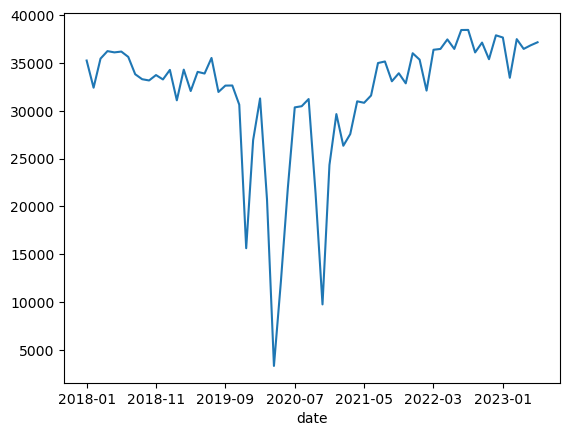

In [6]:
df_base.groupby("date")["nb_train_prevu"].sum().plot()

Il y a une claire influence du Covid sur le traffic : afin de différencier cette période anormale du reste, il convient d'ajouter une nouvelle colonne binaire qui vaut 1 lors de mois de confinement et 0 sinon. Une autre option plus évoluée aurait été d'utiliser le "stringency index" qui évalue l'intensité (entre 0 et 1) du Covid par pays basé sur de nombreux critères (nombre de malades, ouverture des espaces publics, droit de circulation...).

### 1.3 Répartition géographique des retards moyens par ligne pour tous les trains
Deux cartes qui représentent le retard moyen des trains partant d'une station ou arrivant à une station (utilisation d'un code couleur pour illustrer ce retard moyen)

In [7]:
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}

In [8]:
# Add geo features
# https://medium.com/@amorrison_58444/geocoding-with-the-openstreetmap-api-and-geopy-325633980a15
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="adrico")

def get_coordinates(station_names):
    station_coords = {}
    for station_name in station_names:
        # city_name = station_name.split(" ")[0]
        if station_name in station_coords.keys():
            break
        pays = gare_to_pays.get(station_name, "France")
        location_variable = geolocator.geocode(f"{station_name}, {pays}", limit=1, exactly_one=False)
        # print(location_variable)
        for info in location_variable:
            # print(info.raw)
            lat = info.raw["lat"]
            lon = info.raw["lon"]
            station_coords[station_name] = (lat, lon)
    return station_coords

station_names = sorted(list(set(list(df_base.gare_depart.unique()) + list(df_base.gare_arrivee.unique()))))
station_coords = get_coordinates(station_names)

for station_type in ["depart", "arrivee"]:
    df_base[f"geo_infos_{station_type}"] = df_base[f"gare_{station_type}"].apply(lambda x:station_coords[x])

In [9]:
df_base.describe()["retard_moyen_tous_trains_arrivee"]

count    8154.000000
mean        5.668612
std         7.971691
min      -472.638889
25%         3.129384
50%         4.962422
75%         7.673542
max        92.000000
Name: retard_moyen_tous_trains_arrivee, dtype: float64

In [10]:
# https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717

import folium

colors = ["green", "orange", "red"]

for station_type in ["depart", "arrivee"]:
    sncf_map = folium.Map(location=[47,2], zoom_start=5, tiles="cartodb positron")
    df_delay_train_map = pd.DataFrame(df_base.groupby([f"gare_{station_type}", "geo_infos_depart", "geo_infos_arrivee"])["retard_moyen_tous_trains_arrivee"].mean()).reset_index(level=[0,1,2]).copy(deep=True)
    max_mean_delay = max(df_delay_train_map.retard_moyen_tous_trains_arrivee)

    for idx, row in df_delay_train_map.iterrows():
        line_coords = []
        geo_col_name = f"geo_infos_{station_type}"
        station_col_name = f"gare_{station_type}"
        lat, lon = row[geo_col_name]
        line_coords.append((lat, lon))
        station = row[station_col_name]
        delay = row["retard_moyen_tous_trains_arrivee"]
        if delay <= 0:
            color = colors[0]
        else:
            color = colors[min(len(colors)-1, int(delay*(len(colors))/max_mean_delay))]
        folium.Marker(location=[lat,lon], popup = station, icon=folium.Icon(color=color)).add_to(sncf_map)
        # FOR SOME REASON, POLYLINE CRASHES THE KERNEL...
        # folium.PolyLine(line_coords,
        #                 color=color,
        #                 weight=15,
        #                 opacity=0.8).add_to(train_map)
    sncf_map.save(f"train_map_{station_type}_1.html")

## Etape 2 : Préprocessing des données

### 2.1 Sélection des colonnes d'intérêt et premiers ajouts de feature engineering (séparation de la date, ajout du booléen Covid)

In [11]:
columns = df_base.columns.to_list()
num_cols = ["annee", "mois", "duree_moyenne", "nb_train_prevu", "retard_moyen_tous_trains_arrivee"]
cat_cols = ["service", "gare_depart", "gare_arrivee"]
covid_months = ["2020-03", "2020-04", "2020-05", "2020-11", "2020-12", "2021-04"]

df_delay = df_base[columns[:6] + ["retard_moyen_tous_trains_arrivee"]].copy(deep=True)
df_delay[['annee', 'mois']] = df_delay['date'].str.split('-', n=1, expand=True)
df_delay.annee = pd.to_numeric(df_delay.annee)
df_delay.mois = pd.to_numeric(df_delay.mois)
df_delay["covid"] = df_delay["date"].apply(lambda x:1 if x in covid_months else 0)
df_delay.drop(['date'], axis=1, inplace=True)
df_delay.drop_duplicates(inplace=True)

df_delay.describe(include="all")

,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,retard_moyen_tous_trains_arrivee,annee,mois,covid
count,8154,8154,8154,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
unique,2,59,59,NaN,NaN,NaN,NaN,NaN,NaN
top,National,PARIS LYON,PARIS LYON,NaN,NaN,NaN,NaN,NaN,NaN
freq,7142,1649,1649,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,169.860314,257.198308,5.668612,2020.240986,6.236326,0.089895
std,NaN,NaN,NaN,87.390774,173.815703,7.971691,1.608478,3.441466,0.286048
min,NaN,NaN,NaN,0.000000,0.000000,-472.638889,2018.000000,1.000000,0.000000
25%,NaN,NaN,NaN,100.000000,142.000000,3.129384,2019.000000,3.000000,0.000000
50%,NaN,NaN,NaN,164.000000,221.000000,4.962422,2020.000000,6.000000,0.000000
75%,NaN,NaN,NaN,221.000000,333.000000,7.673542,2022.000000,9.000000,0.000000


### 2.2 Gestion des outliers
Remarque : Il n'y a aucune valeur manquante donc on peut sauter l'étape de l'imputation des valeurs manquantes

In [12]:
# valeur min de -472.638889 pour retard_moyen_tous_trains_arrivee...
# sns.histplot(df_delay_train['retard_moyen_tous_trains_arrivee'])
# df_delay_train.sort_values(by=["retard_moyen_tous_trains_arrivee"], ascending=True)

# Méthode de Tuckey pour les outliers

def smooth_outliers(val, outlier_step, Q1, Q3):
    if val < Q1-outlier_step:
        val = Q1-outlier_step
    elif val > Q3+outlier_step:
        val = Q3+outlier_step
    return val

def clean_outliers(df, outlier_cols):
    # df = input_df.copy(deep=True)
    for col_name in outlier_cols:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col_name], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col_name],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        df[col_name] = df[col_name].apply(lambda x: smooth_outliers(x, outlier_step, Q1, Q3))
    return df

# df_delay_train.describe(include="all")

In [13]:
# CREATE = FEATURE ENGINEERING

# Simple binary ohe for the "service" feature
# for df in [df_delay_train, df_delay_test]:
#     df.service = df.service.apply(lambda x: 0 if x == "National" else 1)

In [14]:
# For the "gare_depart" and "gare_arrivee" features:
# Applying simple OHE will give way to many sparse features (more than 100...)
# https://annahava.medium.com/too-many-categories-how-to-deal-with-categorical-features-of-high-cardinality-d4563cfe62d6

# We need to find a way to group these features : clusters !
# - groupe train stations by magnitude of the associated city ?
# - by vague geographic location ?
# - merge both features into one and then applying some clustering ?
# - ...

### 2.3 Feature Engineering
Par ligne de train : 
- Ajout du retard moyen passé
- Ajout des retards moyens des mois n-1, n-2 et n-3

Par ailleurs, afin de conserver quelques informations géograhiques, si le train part/arrive dans un pays qui n'est pas la France, on note le nom du pays. On aurait aussi pu regrouper les stations par ligne de TGV...

In [15]:
# Add the average delay for the train line
# On ne prend que en compte les trajets passés !!!

def add_past_avg_delay(df):

    df["retards_moy_arrivee_trajet_passés"] = 0.0

    for i, row in df.iterrows():
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        if i>1:
            mean_delay_series = df[:i-1].loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee),"retard_moyen_tous_trains_arrivee"]
            # print(mean_delay)
            if mean_delay_series.empty:
                # on prend la même valeur pour la première occurence de chaque trajet
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]
            else:
                mean_delay =  mean_delay_series.mean()
                df.loc[i, "retards_moy_arrivee_trajet_passés"] = mean_delay
        else:
            # on prend la même valeur pour la première occurence de chaque trajet (qui est aussi la première ligne du df dans ce cas)
            df.loc[i, "retards_moy_arrivee_trajet_passés"] = row["retard_moyen_tous_trains_arrivee"]

    return df

In [16]:
# On ajoute les retards de chacun des trois mois précédents (doit-on enlever les 3 premiers mois du dataset du coup ?)

def add_delays_previous_months(df, n_months):
    past_month_cols = [f"retards_moys_mois_n-{i}" for i in range(1, n_months+1)]
    for col in past_month_cols:
        df[col] = 0.0
    for i,row in df.iterrows():
        # if i%500 == 0:
        #     print(i)
        annee, mois = row["annee"], row["mois"]
        gare_depart, gare_arrivee = row["gare_depart"], row["gare_arrivee"]
        for j, col_name in enumerate(past_month_cols):
            n_mois_a_soustraire = j+1
            date_mois_prec = (annee, mois-n_mois_a_soustraire) if mois>=n_mois_a_soustraire+1 else ((annee-1, 12+mois-n_mois_a_soustraire) if annee>=2019 else (annee, mois))
            # print((annee, mois), n_mois_a_soustraire, date_mois_prec)
            series = df.loc[(df.gare_depart == gare_depart) & (df.gare_arrivee == gare_arrivee) & (df.annee == date_mois_prec[0]) & (df.mois == date_mois_prec[1]), "retard_moyen_tous_trains_arrivee"]
            # print(series)
            if not series.empty:
                value = series.values[0]
                # print(value)
                df.loc[i, col_name] = value
            else:
                # un peu brutal de prendre la moyenne totale direct : on pourrait essayer le mois d'avant encore ou l'année d'avant...
                df.loc[i, col_name] = row["retards_moy_arrivee_trajet_passés"]
    return df

In [17]:
# Ajout des pays

def add_countries(df, gare_to_pays):
    df["pays"] = df.apply(lambda row: gare_to_pays.get(row["gare_depart"], gare_to_pays.get(row["gare_arrivee"], "France")), axis=1)
    return df

# def add_summer(df):
#     df["summer"] = df["mois"].apply(lambda x: x in [6, 7, 8])
#     return df

### 2.4 Conversion des données
Dernière étape qui consiste à scale les données numériques et encoder (one-hot) les données catégorielles

In [18]:
# CONVERT

def convert_dataframes(df, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True):
    df = df.drop(drop_cols, axis=1, inplace=False)
    df = pd.get_dummies(df, prefix=["mois", "pays"], columns=dummy_cols, drop_first=True)
    if train:
        df[numeric_scale_cols] = scaler.fit_transform(df[numeric_scale_cols])
    else:
        df[numeric_scale_cols] = scaler.transform(df[numeric_scale_cols])
    return df, scaler

### 2.5 Application de toute la pipeline à nos données
Attention à bien appliquer le train-test-splt afin d'éviter tout "data leakage"

In [19]:
# Full Data Preprocessing pipeline

# TRAIN-TEST SPLIT
def train_test_split(df):
    return df.loc[df.annee < 2023], df.loc[df.annee == 2023]
df_delay_train, df_delay_test = train_test_split(df_delay)

# MISSING VALUES
print(f"Train df : {df_delay_train.isna().sum().sum() == 0}") # no missing values
print(f"Test df : {df_delay_test.isna().sum().sum() == 0}") # no missing values

# OUTLIERS
print("Dealing with outliers")
outlier_cols = ["duree_moyenne", "nb_train_prevu", "retard_moyen_tous_trains_arrivee"]
print("   Train")
df_delay_train = clean_outliers(df_delay_train, outlier_cols)
# print("   Test")
# df_delay_test = clean_outliers(df_delay_test)

# FEATURE ENGINEERING
print("Feature engineering")
full_delay_df = pd.concat([df_delay_train, df_delay_test])
# print("   Add summer bool")
# full_delay_df = add_summer(full_delay_df)
print("   Adding average delays of all previous months")
full_delay_df = add_past_avg_delay(full_delay_df)
n_months = 3
print(f"   Adding delays of {n_months} previous months")
full_delay_df = add_delays_previous_months(full_delay_df, n_months)
print("   Adding country info")
gare_to_pays = {"GENEVE":"Suisse", "ZURICH":"Suisse", "ITALIE":"Italie", "LAUSANNE":"Suisse", "BARCELONA":"Espagne", "MADRID":"Espagne", "STUTTGART":"Allemagne", "FRANCFORT":"Allemagne"}
full_delay_df = add_countries(full_delay_df, gare_to_pays)

# CONVERT
print("Dataframe conversions")
drop_cols = ["service", "gare_depart", "gare_arrivee", "annee"]
dummy_cols = ["mois", "pays"]
target_col = ["retard_moyen_tous_trains_arrivee"]
numeric_scale_cols = [col for col in df_delay_train.columns if col not in drop_cols + dummy_cols + target_col]

df_delay_train_clean, df_delay_test_clean = train_test_split(full_delay_df)

scaler = MinMaxScaler()
print("   Train")
df_delay_train_clean, fitted_scaler = convert_dataframes(df_delay_train_clean, drop_cols, dummy_cols, numeric_scale_cols, scaler, train=True)
print("   Test")
df_delay_test_clean, fitted_scaler = convert_dataframes(df_delay_test_clean, drop_cols, dummy_cols, numeric_scale_cols, fitted_scaler, train=False)
df_delay_test_clean = df_delay_test_clean.reindex(columns = df_delay_train_clean.columns, fill_value=0) # add zeros for the ohe months of the train set

# X and y splits
print("Splitting into X and y")
df_delay_train_clean_X, df_delay_train_clean_y = df_delay_train_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_train_clean[target_col[0]])
df_delay_test_clean_X, df_delay_test_clean_y = df_delay_test_clean.drop(target_col, axis=1, inplace=False), pd.DataFrame(df_delay_test_clean[target_col[0]])

Train df : True
Test df : True
Dealing with outliers
   Train
Feature engineering
   Adding average delays of all previous months


   Adding delays of 3 previous months
   Adding country info
Dataframe conversions
   Train
   Test
Splitting into X and y


### 2.6 : Retour sur l'exploration des données 
On ajoute les nouvelles colonnes à l'analyse pour établir les corrélations (sous forme de heatmap par soucis de visualisation)

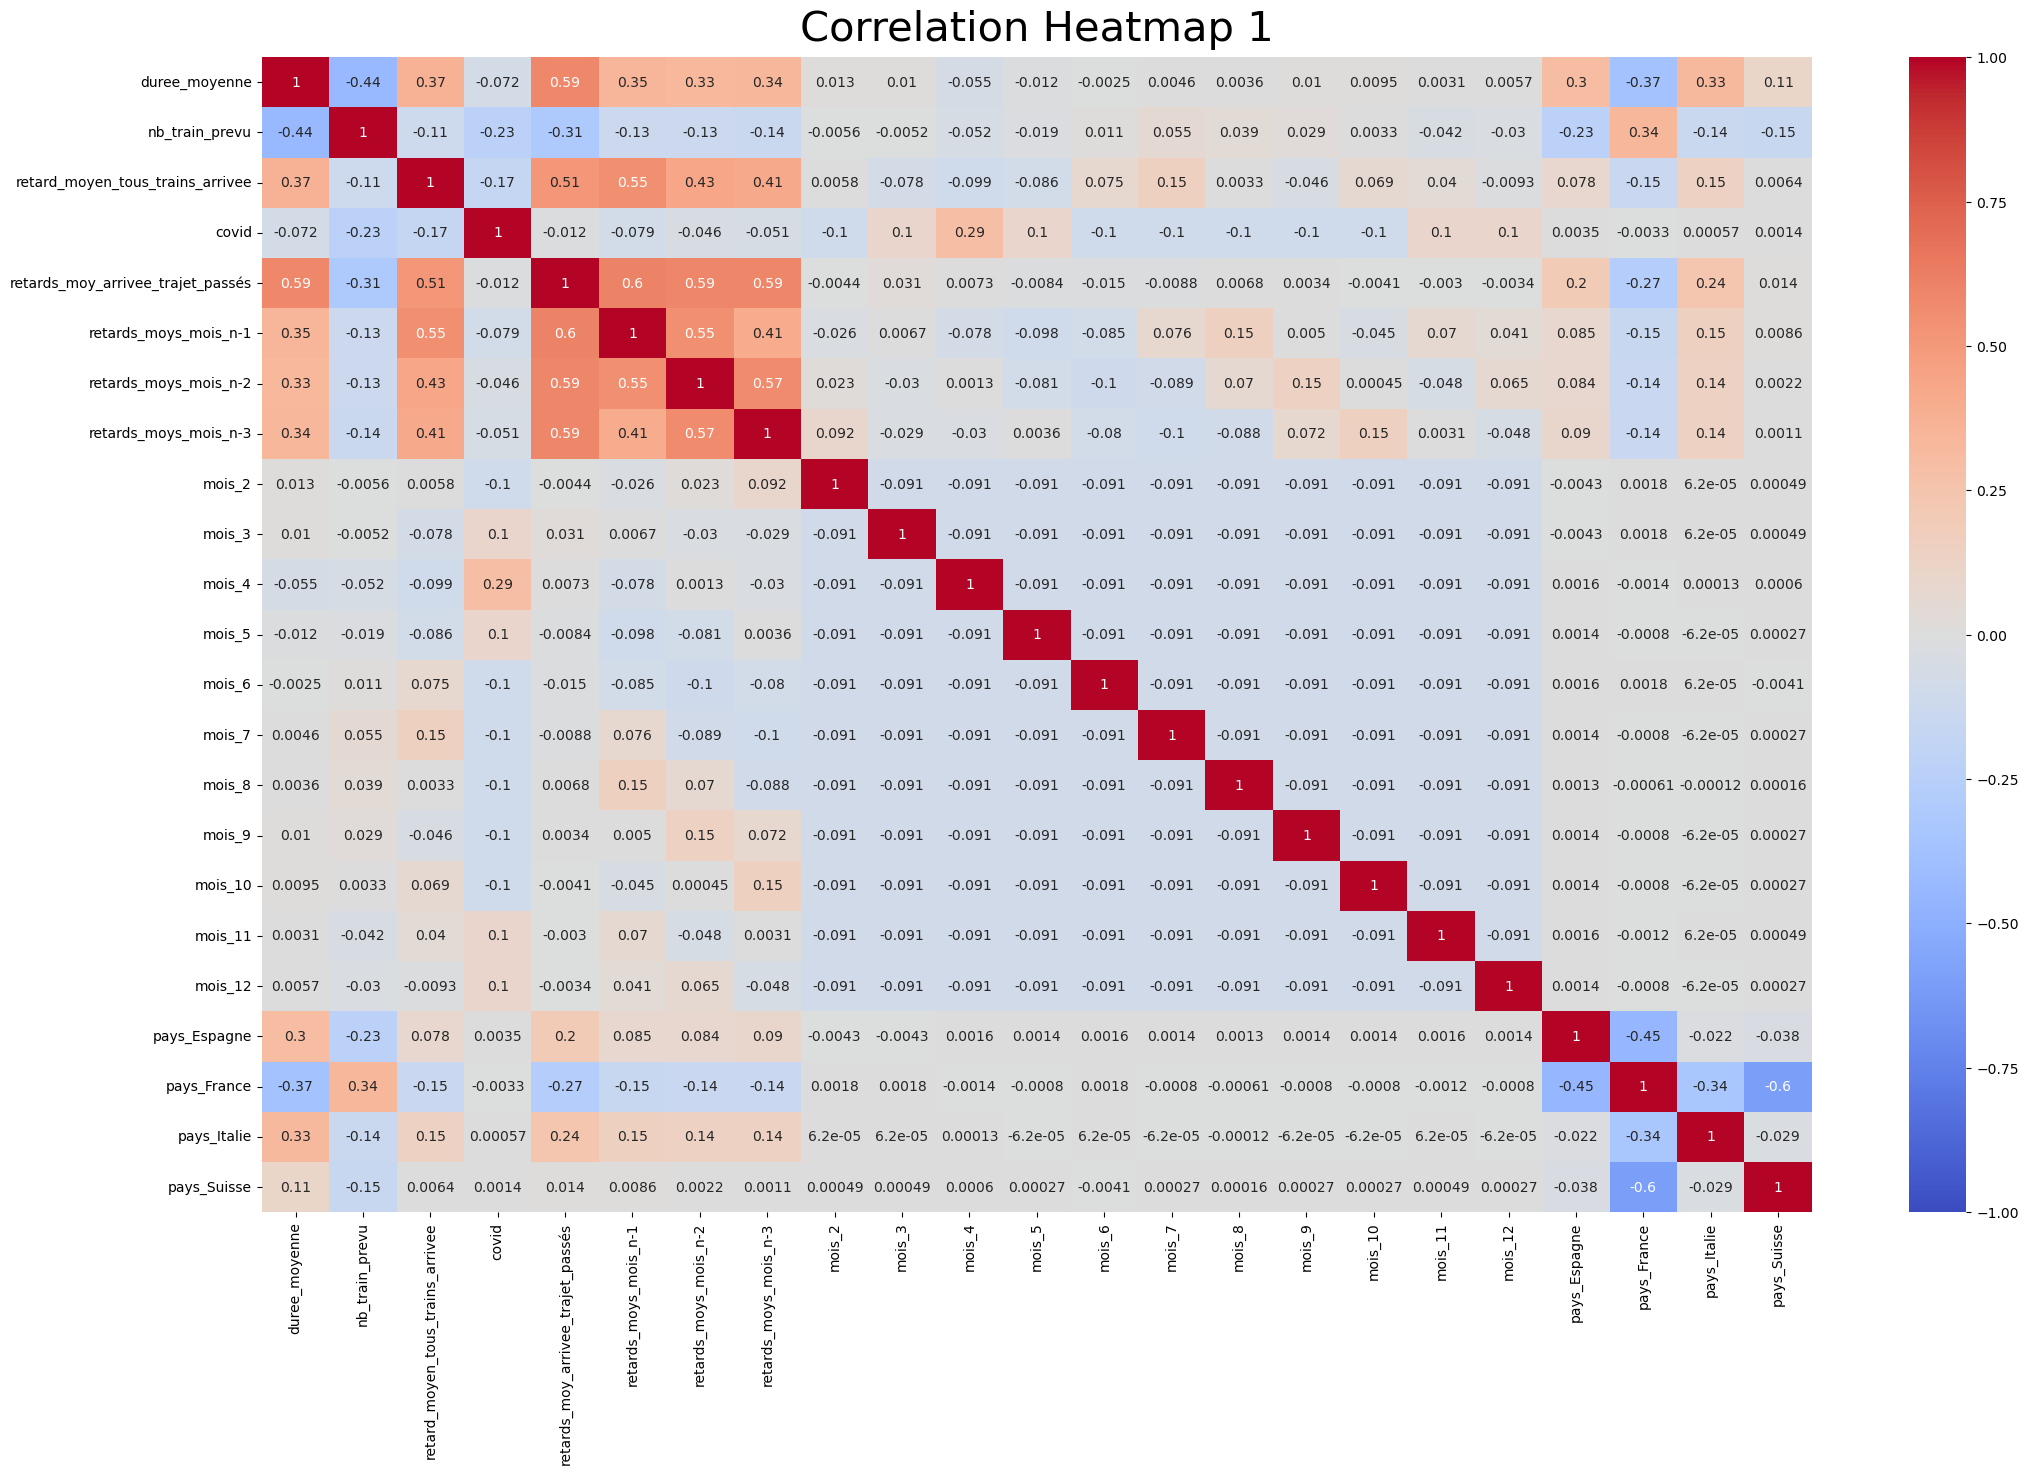

In [20]:
# Add heatmaps of the dataframe's correlation matrix
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df_delay_train_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap 1', fontdict={'fontsize':30}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('full_heatmap.png', dpi=300, bbox_inches='tight')

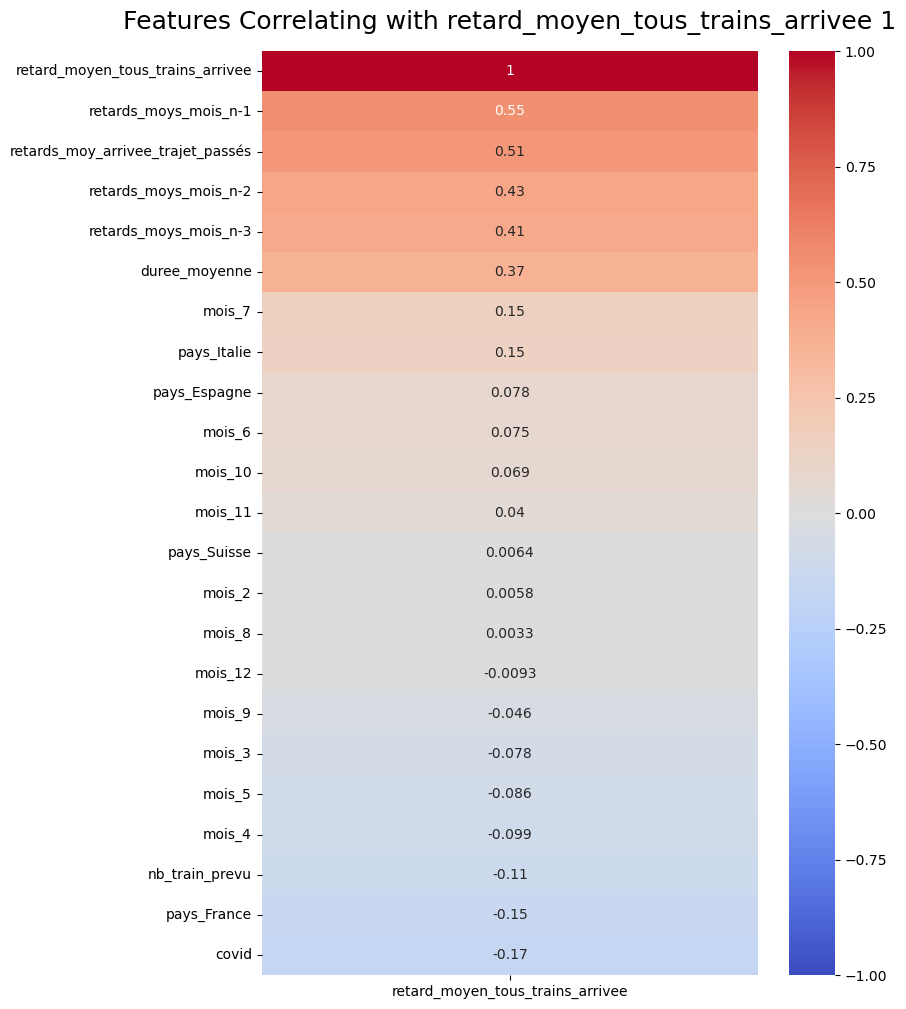

In [21]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_delay_train_clean.corr()[target_col].sort_values(by=target_col[0], ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title(f'Features Correlating with {target_col[0]} 1', fontdict={'fontsize':18}, pad=16)
plt.savefig('target_heatmap.png', dpi=300, bbox_inches='tight')

Description des corrélations :
- Très grande corrélation entre les retards des mois précédents (3 mois + moyenne globale)
- Assez peu d'influence des mois à part juillet : début de l'été donc beaucoup de départs ?
- Peu d'infos supplémentaires avec l'ajout du pays étranger (sauf pour l'Italie)

## 3 : Application de modèles pour la tâche de régression

### 3.1 Evaluation d'un XGboost et Random Forest non-finetunés sur le TRAIN SET

In [27]:
# BASIC EVLUATION OF REGRESSION MODELS ON TRAIN SET

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

def basic_train_set_eval(model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, df_delay_train_clean_X, df_delay_train_clean_y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print(f'Model name : {type(model).__name__} -- Mean MAE on TRAIN SET: {scores.mean():.3f} ({scores.std():.3f})')

models = [DummyRegressor(strategy='mean'), XGBRegressor(), RandomForestRegressor()]

for model in models:
    basic_train_set_eval(model)

Model name : DummyRegressor -- Mean MAE on TRAIN SET: 2.815 (0.067)
Model name : XGBRegressor -- Mean MAE on TRAIN SET: 1.802 (0.054)
Model name : RandomForestRegressor -- Mean MAE on TRAIN SET: 1.776 (0.055)


### 3.2 Finetuning de ces même modèles et évaluation sur le TEST SET
On utilise ici une sélection des hyperparamètres par HalvingRandomSearchCV pour accélerer le processus

In [28]:
from sklearn.metrics import mean_absolute_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features).reshape(len(test_labels), 1)
    mae = mean_absolute_error(test_labels, predictions)
    print('Mean Absolute Error on TEST SET: {:0.4f}.'.format(mae))
    
    return mae

In [29]:
from pprint import pprint
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingRandomSearchCV
# from sklearn.model_selection import RandomizedSearchCV


xgb = XGBRegressor()
# pprint(xgb.get_params())
xgb_random_grid = {
    "n_estimators":[int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)],
    "max_depth":list(range(1, 11)),
    "eta":[0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.8, 1],
    "colsample_bytree":[0.5, 0.8, 1]
}

rf = RandomForestRegressor(random_state = 42)

rf_random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4]
}

model_inits = [(xgb, xgb_random_grid), (rf, rf_random_grid)]

def tune_hyperparams(model_init):
    model, param_grid = model_init
    model_name = type(model).__name__
    print(f"HYPERPARAMETER TUNING FOR {type(model).__name__}")
    model_random = HalvingRandomSearchCV(estimator = xgb, scoring = "neg_mean_absolute_error" , param_distributions = param_grid, n_candidates = "exhaust", cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    model_random.fit(df_delay_train_clean_X, df_delay_train_clean_y)
    pprint(model_random.best_params_)

    best_random_model = model_random.best_estimator_
    random_mae = evaluate(best_random_model, df_delay_test_clean_X, df_delay_test_clean_y)
    print(f'Model name : {model_name} -- Mean MAE on TEST SET: {random_mae:.3f}')
    return model_name, best_random_model, random_mae

best_models = {}
for model_init in model_inits:
    model_name, best_random_model, random_mae = tune_hyperparams(model_init)
    best_models[model_name] = (best_random_model, random_mae)
    
sorted_best_models = {k: v for k, v in sorted(best_models.items(), key=lambda item: item[1][1])}
print(sorted_best_models)

HYPERPARAMETER TUNING FOR XGBRegressor
n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 10
max_resources_: 7428
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 742
n_resources: 10
Fitting 5 folds for each of 742 candidates, totalling 3710 fits
----------
iter: 1
n_candidates: 248
n_resources: 30
Fitting 5 folds for each of 248 candidates, totalling 1240 fits
----------
iter: 2
n_candidates: 83
n_resources: 90
Fitting 5 folds for each of 83 candidates, totalling 415 fits
----------
iter: 3
n_candidates: 28
n_resources: 270
Fitting 5 folds for each of 28 candidates, totalling 140 fits
----------
iter: 4
n_candidates: 10
n_resources: 810
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 5
n_candidates: 4
n_resources: 2430
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 7290
Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'colsample_

### 3.3 Affichage des prédictions du meilleur modèle

In [45]:
best_model = list(sorted_best_models.values())[0][0]
predictions = best_model.predict(df_delay_test_clean_X)
df_predict = df_delay.loc[df_delay.annee == 2023].copy(deep=True)
df_predict["predictions"] = predictions
df_predict["abs_errors"] = abs(df_predict["predictions"] - df_predict["retard_moyen_tous_trains_arrivee"])
print(f"Mean Absolute Error on TEST SET {df_predict['abs_errors'].mean()}")
df_predict

Mean Absolute Error on TEST SET 2.1077479001177233


,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,retard_moyen_tous_trains_arrivee,annee,mois,covid,predictions,abs_errors
7428,International,PARIS EST,STUTTGART,189,150,13.333464,2023,1,0,9.222651,4.110812
7429,International,PARIS LYON,ZURICH,247,129,7.943927,2023,1,0,6.736937,1.206990
7430,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,140,1075,6.065343,2023,1,0,6.416065,0.350722
7431,National,CHAMBERY CHALLES LES EAUX,PARIS LYON,180,334,9.004088,2023,1,0,7.633475,1.370613
7432,National,MACON LOCHE,PARIS LYON,99,252,9.226940,2023,1,0,8.041762,1.185177
...,...,...,...,...,...,...,...,...,...,...,...
8149,National,STRASBOURG,PARIS EST,114,492,7.689898,2023,6,0,7.360584,0.329314
8150,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,14.824264,2023,6,0,9.791312,5.032951
8151,National,TOURS,PARIS MONTPARNASSE,78,192,8.650349,2023,6,0,3.565223,5.085127
8152,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,12.765753,2023,6,0,9.228361,3.537392


Ainsi, en moyenne, notre modèle prédit le retard pour chaque ligne avec une erreur de 2.1 minutes. Il fait cela un mois à l'avance avec peu d'informations, ce qui est assez remarquable !

A présent, il peut être intéressant de regarder les cas que le modèle arrive à mieux prédire ou au contraire ceux avec lesquels il a le plus de mal...

In [35]:
prediction_analysis_df = df_predict.groupby(by=["gare_depart", "gare_arrivee"])[["nb_train_prevu", "duree_moyenne", "retard_moyen_tous_trains_arrivee", "abs_errors"]].mean().sort_values(by="abs_errors").reset_index()
prediction_analysis_df

,gare_depart,gare_arrivee,nb_train_prevu,duree_moyenne,retard_moyen_tous_trains_arrivee,abs_errors
0,PARIS LYON,LAUSANNE,159.333333,234.500000,5.095814,0.591191
1,REIMS,PARIS EST,234.833333,45.833333,2.256147,0.617335
2,PARIS EST,STRASBOURG,561.833333,113.000000,3.447494,0.933011
3,PARIS EST,REIMS,235.666667,45.833333,2.491587,0.943445
4,DOUAI,PARIS NORD,178.666667,74.500000,5.239450,0.949559
...,...,...,...,...,...,...
116,MACON LOCHE,PARIS LYON,245.000000,97.666667,12.379063,4.078814
117,STRASBOURG,NANTES,56.000000,334.000000,5.666618,4.305938
118,PARIS EST,FRANCFORT,129.000000,235.666667,8.545801,4.609467
119,TOURCOING,BORDEAUX ST JEAN,29.333333,300.500000,7.910088,6.492545


Text(0.5, 1.0, 'Correlation Heatmap for Predictions Analysis')

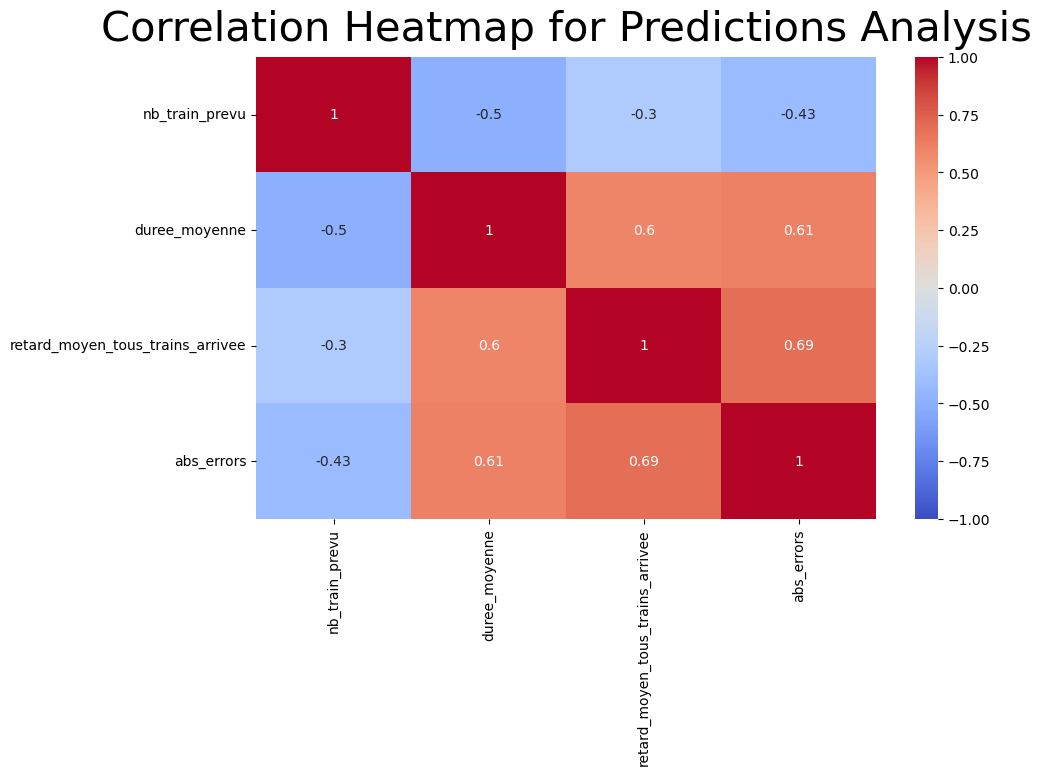

In [32]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(prediction_analysis_df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap for Predictions Analysis', fontdict={'fontsize':30}, pad=12)

Les erreurs de prédiction augmentent lorsque la durée moyenne et le retard moyen augmentent (plus de variance...) mais diminuent lorsque le nombre de trains prévus augmente (la valeur moyenne des retards est peut être plus lisse et donc plus facielement prévisible...)

On peut aussi plot pour la meilleure (ou pire) ligne de train les valeurs réelles/prédites/d'erreur au fil des 6 mois de 2023 (test set) :

Plot pour la ligne PARIS LYON -> LAUSANNE


<Axes: xlabel='mois'>

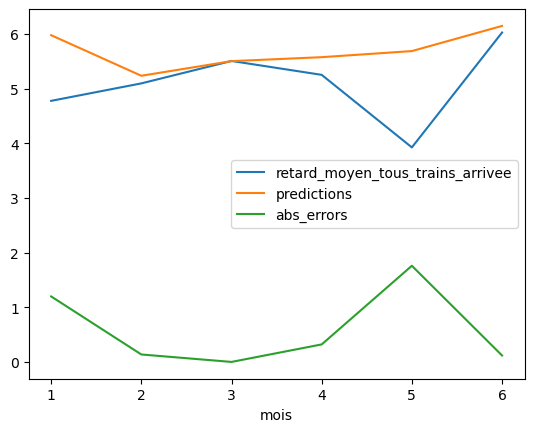

In [40]:
best_gare_depart = prediction_analysis_df.gare_depart[0]
best_gare_arrivee = prediction_analysis_df.gare_arrivee[0]
print(f"Plot pour la ligne {best_gare_depart} -> {best_gare_arrivee}")
df_predict.loc[(df_predict.gare_depart == best_gare_depart) & (df_predict.gare_arrivee == best_gare_arrivee)][["mois", "retard_moyen_tous_trains_arrivee", "predictions", "abs_errors"]].plot(x="mois")

Plot pour la ligne ITALIE -> PARIS LYON


<Axes: xlabel='mois'>

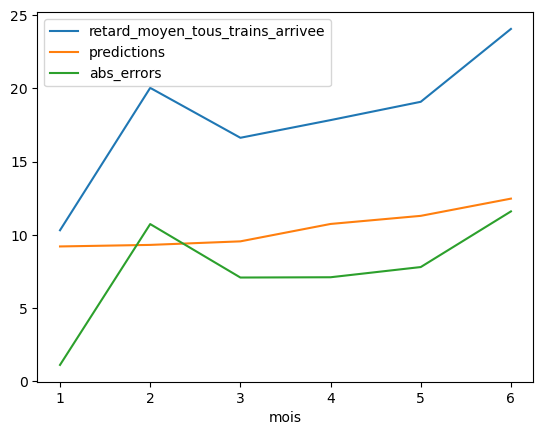

In [43]:
worst_gare_depart = prediction_analysis_df.gare_depart[len(prediction_analysis_df.index)-1]
worst_gare_arrivee = prediction_analysis_df.gare_arrivee[len(prediction_analysis_df.index)-1]
print(f"Plot pour la ligne {worst_gare_depart} -> {worst_gare_arrivee}")
df_predict.loc[(df_predict.gare_depart == worst_gare_depart) & (df_predict.gare_arrivee == worst_gare_arrivee)][["mois", "retard_moyen_tous_trains_arrivee", "predictions", "abs_errors"]].plot(x="mois")

## 4. Next Steps : Quelques idées...
- Ajouter les retards moyens de plus de mois précédents (n-4, n-5...) ?
- Ajouter d'avantage d'infos géographiques : groupements par ligne de TGV par exemple
